In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

### 1. ¿Cuál es el ingreso total generado por el negocio?

In [4]:
#Conexión a base de datos
conexion = sqlite3.connect("./datos/sanoyfresco.db")

total_ventas = pd.read_sql_query("""SELECT SUM(precio_total) AS ingreso_total FROM tickets""", conexion)

print(f"Ingreso total generado por el negocio: {total_ventas['ingreso_total'][0]:,.2f}")

#Cerrar la conexión
conexion.close()

Ingreso total generado por el negocio: 39,854,875.32


### 2. ¿Cómo ha sido la tendencia de ingresos mensuales?

In [ ]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")

tendencia_ventas = pd.read_sql_query("""SELECT strftime('%Y-%m', fecha) AS mes, SUM(precio_total) AS ingresos_mensuales
                                     FROM tickets
                                     GROUP BY mes
                                     ORDER BY mes""", conexion)

print("\n Tendencia de ingresos mensuales: ")
print(tendencia_ventas)

conexion.close()

plt.figure(figsize=(10, 6)) 
plt.bar(tendencia_ventas['mes'], tendencia_ventas['ingresos_mensuales'], color='skyblue', edgecolor='black')  

plt.title('Tendencia de Ingresos Mensuales', fontsize=14) 
plt.xlabel('Mes', fontsize=12) 
plt.ylabel('Ingresos Mensuales', fontsize=12) 
plt.xticks(rotation=45)

plt.show()

### 3. ¿Cuál es el rendimiento de cada departamento en términos de ventas?

In [ ]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")

ventas_departamento = pd.read_sql_query("""SELECT id_departamento, SUM(precio_total) AS ingreso_departamento
                                     FROM tickets
                                     WHERE id_departamento IN (4, 16, 20, 7)
                                     GROUP BY id_departamento
                                     ORDER BY ingreso_departamento DESC""", conexion)

print("\n Rendimiento de cada departamento en términos de ventas: ")
print(ventas_departamento)

conexion.close()

plt.figure(figsize=(10, 6))
plt.bar(ventas_departamento['id_departamento'], ventas_departamento['ingreso_departamento'], color='skyblue',  edgecolor='black') 

plt.title('Rendimiento de cada departamento', fontsize=14)
plt.xlabel('ID Departamento', fontsize=12) 
plt.ylabel('Ingreso por ventas', fontsize=12) 
plt.xticks(rotation=45) 

plt.show()

### 4: ¿Cómo se distribuyen las ventas entre las diferentes secciones?


In [ ]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")

ventas_secciones = pd.read_sql_query("""SELECT id_seccion, SUM(precio_total) AS ingreso_seccion
                                     FROM tickets
                                     WHERE id_seccion IN (24, 123, 83, 67, 53, 84, 115, 16)
                                     GROUP BY id_seccion
                                     ORDER BY ingreso_seccion DESC;""", conexion)

print("\n Ventas entre las diferentes secciones: ")
print(ventas_secciones)

conexion.close()

plt.figure(figsize=(10, 6))
plt.bar(ventas_secciones['id_seccion'], ventas_secciones['ingreso_seccion'], color='lightgreen', edgecolor='black')

plt.title('Rendimiento de Ventas por sección', fontsize=14) 
plt.xlabel('ID Seccion', fontsize=12) 
plt.ylabel('Ingreso por ventas', fontsize=12) 
plt.xticks(rotation=45)

plt.show()

### 5. ¿Cuáles son los 10 productos más vendidos en cantidad?

In [ ]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")

productos_masvendidos = pd.read_sql_query("""SELECT nombre_producto, SUM(cantidad) AS total_vendido
                                     FROM tickets
                                     WHERE nombre_producto IN ('Banana', 'Bolsa de Bananas Orgánicas', 'Fresas Orgánicas', 
                                     'Espinacas Baby Orgánicas', 'Aguacate Hass Orgánico', 
                                     'Aguacate Orgánico', 'Limón Grande', 'Fresas', 'Limones', 
                                     'Leche Entera Orgánica')
                                     GROUP BY nombre_producto
                                     ORDER BY total_vendido DESC""", conexion)

print("\n Ventas entre las diferentes secciones: ")
print(productos_masvendidos)

conexion.close()

plt.figure(figsize=(10, 6))
plt.barh(productos_masvendidos['nombre_producto'], productos_masvendidos['total_vendido'], color='salmon', edgecolor='black')

plt.title('Prdoctos mas vendidos', fontsize=14) 
plt.xlabel('Total vendido', fontsize=12)
plt.ylabel('Producto', fontsize=12) 
plt.xticks(rotation=45) 

plt.show()

###  6: ¿Cuáles son los 10 productos que generan más ingresos?

In [ ]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")

productos_masvendidos = pd.read_sql_query("""SELECT nombre_producto, SUM(precio_unitario * cantidad) AS ingreso_total_producto
                                          FROM tickets
                                          GROUP BY nombre_producto
                                          ORDER BY ingreso_total_producto DESC
                                          LIMIT 10""", conexion)

print("\n Ventas entre las diferentes secciones: ")
print(productos_masvendidos)

conexion.close()

plt.figure(figsize=(10, 6))
plt.barh(productos_masvendidos['nombre_producto'], productos_masvendidos['ingreso_total_producto'], color='lightcoral')

plt.title('Prdoctos mas vendidos', fontsize=14)
plt.xlabel('Ingreso total', fontsize=12)
plt.ylabel('Producto', fontsize=12) 
plt.xticks(rotation=45)

plt.show()

### 7: ¿Quiénes son los 20 clientes que más compran en términos de ingresos?


 Clientes que mas compran en términos de ingreso: 
    id_cliente  total_comprado
0       189425         4784.44
1       145686         4656.01
2        95967         4441.07
3        67870         4381.49
4        51256         4280.17
5       108031         4170.37
6       105213         4164.07
7        66806         4010.08
8       153932         3966.09
9       143296         3887.86
10      175294         3886.68
11        1197         3883.76
12       62239         3873.40
13        5665         3862.69
14       31552         3852.53
15      132274         3842.65
16       14868         3836.05
17      103634         3808.71
18      132022         3803.13
19       94701         3783.81


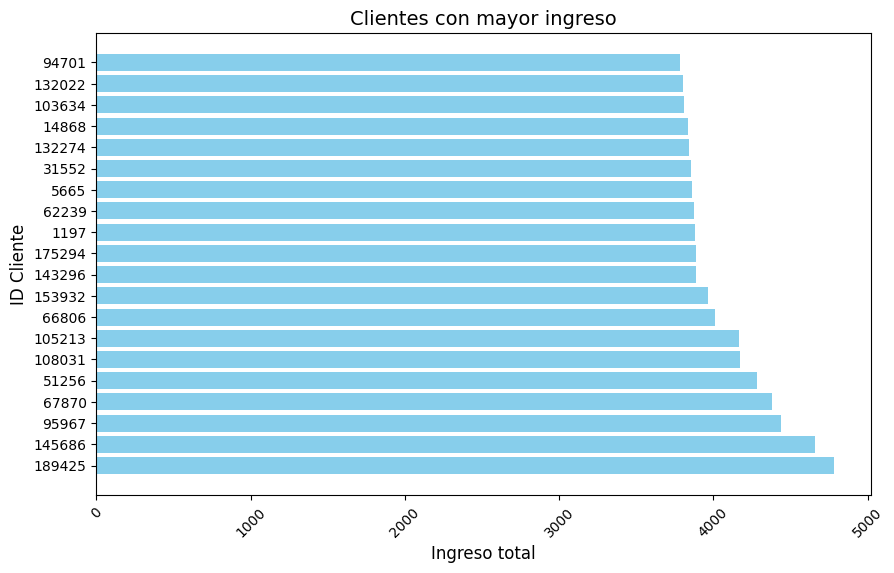

In [19]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")

compras_clientes = pd.read_sql_query("""SELECT id_cliente, SUM(precio_total) AS total_comprado
                                          FROM tickets
                                          GROUP BY id_cliente
                                          ORDER BY total_comprado DESC
                                          LIMIT 20;""", conexion)

print("\n Clientes que mas compran en términos de ingreso: ")
print(compras_clientes)

conexion.close()

plt.figure(figsize=(10, 6))
plt.barh(compras_clientes['id_cliente'].astype(str), compras_clientes['total_comprado'], color='skyblue')

plt.title('Clientes con mayor ingreso', fontsize=14) 
plt.xlabel('Ingreso total', fontsize=12)
plt.ylabel('ID Cliente', fontsize=12)
plt.xticks(rotation=45)

plt.show()

### 8: ¿Cuál es la compra media por cliente?

In [ ]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")

compramed_cliente = pd.read_sql_query("""SELECT AVG(total_comprado) AS compra_media_por_cliente
                                      FROM (
                                          SELECT id_cliente, SUM(precio_total) AS total_comprado
                                          FROM tickets
                                          GROUP BY id_cliente
                                          ) AS clientes_compras""", conexion)

print("\n Compra media por cliente: ")
print(compramed_cliente )

conexion.close()

### 9: ¿Cuántos pedidos totales se han realizado?

In [ ]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")

total_pedidos = pd.read_sql_query("""SELECT COUNT(DISTINCT id_pedido) AS total_pedidos
                                  FROM tickets""", conexion)

print("\n Pedidos totales realizados: ")
print(total_pedidos)

conexion.close()

### 10: ¿Cuál es el valor promedio por pedido?

In [ ]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")

promedio_prpedido = pd.read_sql_query("""SELECT AVG(total_comprado) AS valor_promedio_por_pedido
                                      FROM (
                                          SELECT id_pedido, SUM(precio_total) AS total_comprado
                                          FROM tickets
                                          GROUP BY id_pedido) AS pedidos_totales;""", conexion)

print("\n Pedidos totales realizados: ")
print(promedio_prpedido)

conexion.close()